## Forecasting airlinespassengers data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
#Loading dataset
airlines = pd.read_excel('Airlines+Data.xlsx')

In [3]:
airlines

Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]

### EDA

In [4]:
airlines.shape

(96, 2)

In [5]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
airlines.describe()

Passengers
count   96.000000
mean   213.708333
std     71.918216
min    104.000000
25%    156.000000
50%    200.000000
75%    264.750000
max    413.000000

In [7]:
#making the month column as index
airlines.set_index('Month', inplace=True)

In [8]:
airlines

Passengers
Month                 
1995-01-01         112
1995-02-01         118
1995-03-01         132
1995-04-01         129
1995-05-01         121
...                ...
2002-08-01         405
2002-09-01         355
2002-10-01         306
2002-11-01         271
2002-12-01         306

[96 rows x 1 columns]

In [9]:
airlines.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Month')

In [10]:
airlines.isnull().sum()

Passengers    0
dtype: int64

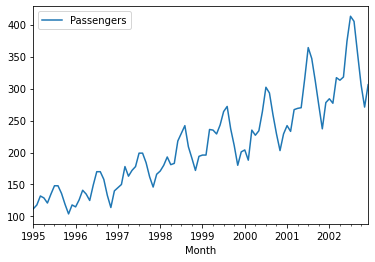

In [11]:
airlines.plot()
plt.show()

- Here we can say that the trend is upward and the sessionality is multiplicative

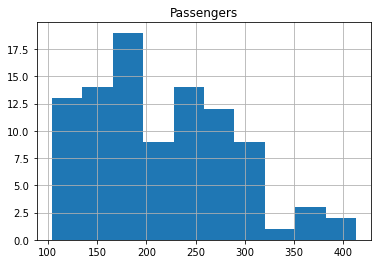

In [12]:
#Histogram and Density plots
airlines.hist()
plt.show()

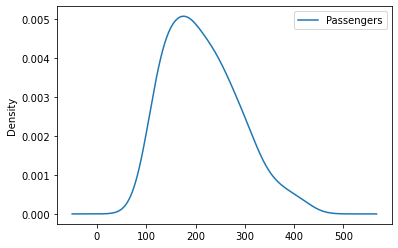

In [13]:
#create a density plot
airlines.plot(kind='kde')
plt.show()

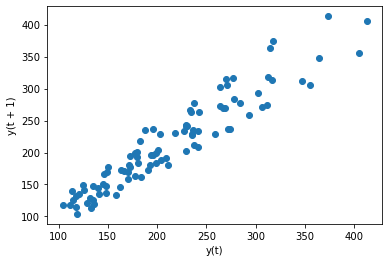

In [14]:
#Lag_plot
lag_plot(airlines)
plt.show()

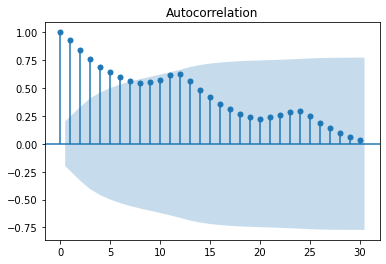

In [15]:
#autocorrelation plot
plot_acf(airlines, lags=30)
plt.show()

In [16]:
unsampled = airlines.resample('M').mean()
print(unsampled.head(32))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       148.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       118.0
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30       135.0
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31       170.0
1996-09-30       158.0
1996-10-31       133.0
1996-11-30       114.0
1996-12-31       140.0
1997-01-31       145.0
1997-02-28       150.0
1997-03-31       178.0
1997-04-30       163.0
1997-05-31       172.0
1997-06-30       178.0
1997-07-31       199.0
1997-08-31       199.0


            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       148.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       118.0
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0


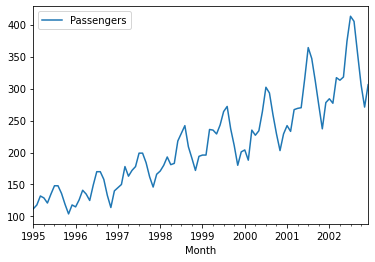

In [18]:
 ## interplation was done for nan values which we get after doing upsampling by month
interpolated = unsampled.interpolate(method='linear')
print(interpolated.head(15))
interpolated.plot()
plt.show()

In [19]:
interpolated

Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
...                ...
2002-08-31       405.0
2002-09-30       355.0
2002-10-31       306.0
2002-11-30       271.0
2002-12-31       306.0

[96 rows x 1 columns]

### Transformation

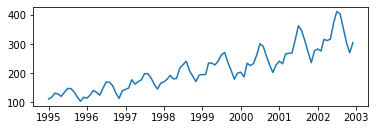

In [20]:
#line plot
plt.subplot(211)
plt.plot(airlines)

<function matplotlib.pyplot.show(close=None, block=None)>

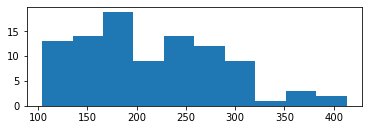

In [21]:
#histogram
plt.subplot(212)
plt.hist(airlines)
plt.show

In [25]:
#square root Transform
dataframe = pd.DataFrame(airlines.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = np.sqrt(dataframe['Passengers'])

<function matplotlib.pyplot.show(close=None, block=None)>

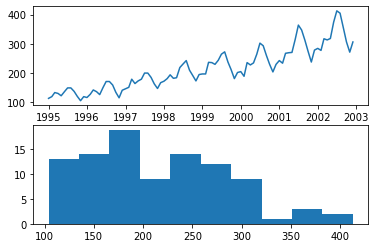

In [26]:
#line plot
plt.subplot(211)
plt.plot(airlines['Passengers'])
#histogram
plt.subplot(212)
plt.hist(airlines['Passengers'])
plt.show

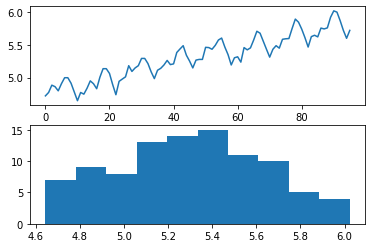

In [28]:
#Log Transform
dataframe = pd.DataFrame(airlines.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = np.log(dataframe['Passengers'])

# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [29]:
Train = interpolated.head(81)
Test = interpolated.tail(15)

In [30]:
#moving average

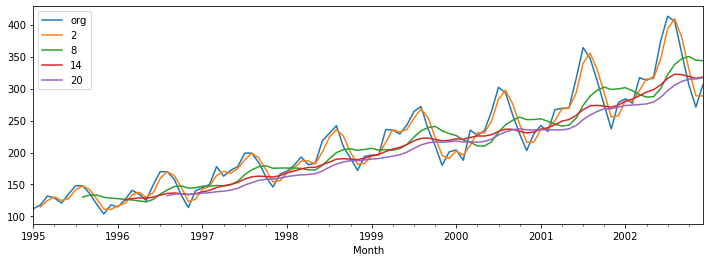

In [31]:
plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label="org")
for i in range(2, 24, 6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [32]:
#Time series decomposition plot

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_1812/905427918.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(interpolated.Passengers,freq=12)


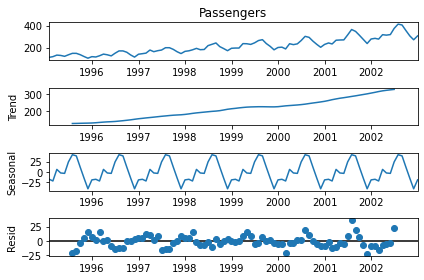

In [33]:
decompose_ts_add = seasonal_decompose(interpolated.Passengers,freq=12)
decompose_ts_add.plot()
plt.show()

In [34]:
#ACF plots and PACF plots

In [35]:
import statsmodels.graphics.tsaplots as tsa_plots

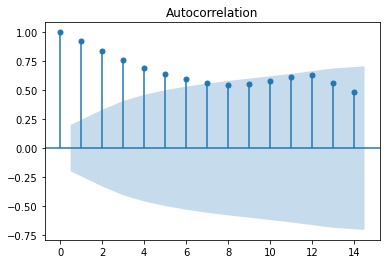

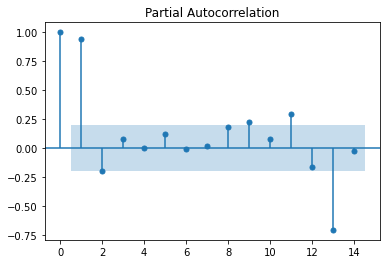

In [37]:
tsa_plots.plot_acf(interpolated.Passengers, lags=14)
tsa_plots.plot_pacf(interpolated.Passengers, lags=14)
plt.show()

### Evaluation metic MAPE

In [38]:
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [41]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses, Test.Passengers)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


11.742916929599609

### Holt Method

In [42]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw, Test.Passengers)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_1812/4145247771.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)


15.508391570053663

### Holts winter exponential smoothing with additive seasonality and additive trend

In [43]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_1812/3047529225.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model


3.3286984178187233

### Holts winter exponential smoothing with multiplicative seasonality and additive trend 

In [44]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_1812/2440570425.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)


2.549670102751685

In [46]:
rmse_hwe_mul_add = np.sqrt(mean_squared_error(pred_hwe_mul_add,Test.Passengers))
rmse_hwe_mul_add

10.418247174550135

### Final model by combining train and test

In [47]:
hwe_model_add_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [48]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2003-01-31    312.763472
2003-02-28    317.863003
2003-03-31    320.290538
2003-04-30    321.060611
2003-05-31    322.942320
2003-06-30    322.247841
2003-07-31    317.861369
2003-08-31    319.155069
2003-09-30    318.736547
2003-10-31    327.017427
Freq: M, dtype: float64

In [49]:
interpolated

Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
...                ...
2002-08-31       405.0
2002-09-30       355.0
2002-10-31       306.0
2002-11-30       271.0
2002-12-31       306.0

[96 rows x 1 columns]

In [50]:
interpolated.reset_index(inplace=True)

In [51]:
interpolated['t'] = 1

In [52]:
interpolated

Month  Passengers  t
0  1995-01-31       112.0  1
1  1995-02-28       118.0  1
2  1995-03-31       132.0  1
3  1995-04-30       129.0  1
4  1995-05-31       121.0  1
..        ...         ... ..
91 2002-08-31       405.0  1
92 2002-09-30       355.0  1
93 2002-10-31       306.0  1
94 2002-11-30       271.0  1
95 2002-12-31       306.0  1

[96 rows x 3 columns]

In [53]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [54]:
interpolated

Month  Passengers   t
0  1995-01-31       112.0   1
1  1995-02-28       118.0   2
2  1995-03-31       132.0   3
3  1995-04-30       129.0   4
4  1995-05-31       121.0   5
..        ...         ...  ..
91 2002-08-31       405.0  92
92 2002-09-30       355.0  93
93 2002-10-31       306.0  94
94 2002-11-30       271.0  95
95 2002-12-31       306.0  96

[96 rows x 3 columns]

In [56]:
#inserted t_sq column with values
interpolated['t_sq'] = (interpolated['t'])**2

In [57]:
interpolated

Month  Passengers   t  t_sq
0  1995-01-31       112.0   1     1
1  1995-02-28       118.0   2     4
2  1995-03-31       132.0   3     9
3  1995-04-30       129.0   4    16
4  1995-05-31       121.0   5    25
..        ...         ...  ..   ...
91 2002-08-31       405.0  92  8464
92 2002-09-30       355.0  93  8649
93 2002-10-31       306.0  94  8836
94 2002-11-30       271.0  95  9025
95 2002-12-31       306.0  96  9216

[96 rows x 4 columns]

In [58]:
interpolated["month"] = interpolated.Month.dt.strftime("%b") # month extraction
interpolated["year"] = interpolated.Month.dt.strftime("%Y") # month extraction

In [59]:
interpolated

Month  Passengers   t  t_sq month  year
0  1995-01-31       112.0   1     1   Jan  1995
1  1995-02-28       118.0   2     4   Feb  1995
2  1995-03-31       132.0   3     9   Mar  1995
3  1995-04-30       129.0   4    16   Apr  1995
4  1995-05-31       121.0   5    25   May  1995
..        ...         ...  ..   ...   ...   ...
91 2002-08-31       405.0  92  8464   Aug  2002
92 2002-09-30       355.0  93  8649   Sep  2002
93 2002-10-31       306.0  94  8836   Oct  2002
94 2002-11-30       271.0  95  9025   Nov  2002
95 2002-12-31       306.0  96  9216   Dec  2002

[96 rows x 6 columns]

In [60]:
months = pd.get_dummies(interpolated['month']) # converting the dummy variables for month column

In [61]:
months

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0     0    0    0    0    1    0    0    0    0    0    0    0
1     0    0    0    1    0    0    0    0    0    0    0    0
2     0    0    0    0    0    0    0    1    0    0    0    0
3     1    0    0    0    0    0    0    0    0    0    0    0
4     0    0    0    0    0    0    0    0    1    0    0    0
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
91    0    1    0    0    0    0    0    0    0    0    0    0
92    0    0    0    0    0    0    0    0    0    0    0    1
93    0    0    0    0    0    0    0    0    0    0    1    0
94    0    0    0    0    0    0    0    0    0    1    0    0
95    0    0    1    0    0    0    0    0    0    0    0    0

[96 rows x 12 columns]

In [62]:
#storing the months as serial wise again in months variable
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [63]:
Airlines = pd.concat([interpolated,months],axis=1)

In [64]:
Airlines.head()

Month  Passengers  t  t_sq month  year  Jan  Feb  Mar  Apr  May  Jun  \
0 1995-01-31       112.0  1     1   Jan  1995    1    0    0    0    0    0   
1 1995-02-28       118.0  2     4   Feb  1995    0    1    0    0    0    0   
2 1995-03-31       132.0  3     9   Mar  1995    0    0    1    0    0    0   
3 1995-04-30       129.0  4    16   Apr  1995    0    0    0    1    0    0   
4 1995-05-31       121.0  5    25   May  1995    0    0    0    0    1    0   

   Jul  Aug  Sep  Oct  Nov  Dec  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0

In [65]:
Airlines['log_passengers'] = np.log(Airlines['Passengers'])
Airlines

Month  Passengers   t  t_sq month  year  Jan  Feb  Mar  Apr  May  Jun  \
0  1995-01-31       112.0   1     1   Jan  1995    1    0    0    0    0    0   
1  1995-02-28       118.0   2     4   Feb  1995    0    1    0    0    0    0   
2  1995-03-31       132.0   3     9   Mar  1995    0    0    1    0    0    0   
3  1995-04-30       129.0   4    16   Apr  1995    0    0    0    1    0    0   
4  1995-05-31       121.0   5    25   May  1995    0    0    0    0    1    0   
..        ...         ...  ..   ...   ...   ...  ...  ...  ...  ...  ...  ...   
91 2002-08-31       405.0  92  8464   Aug  2002    0    0    0    0    0    0   
92 2002-09-30       355.0  93  8649   Sep  2002    0    0    0    0    0    0   
93 2002-10-31       306.0  94  8836   Oct  2002    0    0    0    0    0    0   
94 2002-11-30       271.0  95  9025   Nov  2002    0    0    0    0    0    0   
95 2002-12-31       306.0  96  9216   Dec  2002    0    0    0    0    0    0   

    Jul  Aug  Sep  Oct  Nov  Dec  log_passengers  
0     0    0    0    0    0    0        4.718499  
1     0    0    0    0    0    0        4.770685  
2     0    0    0    0    0    0        4.882802  
3     0    0    0    0    0    0        4.859812  
4     0    0    0    0    0    0        4.795791  
..  ...  ...  ...  ...  ...  ...             ...  
91    0    1    0    0    0    0        6.003887  
92    0    0    1    0    0    0        5.872118  
93    0    0    0    1    0    0        5.723585  
94    0    0    0    0    1    0        5.602119  
95    0    0    0    0    0    1        5.723585  

[96 rows x 19 columns]

<AxesSubplot:xlabel='month', ylabel='year'>

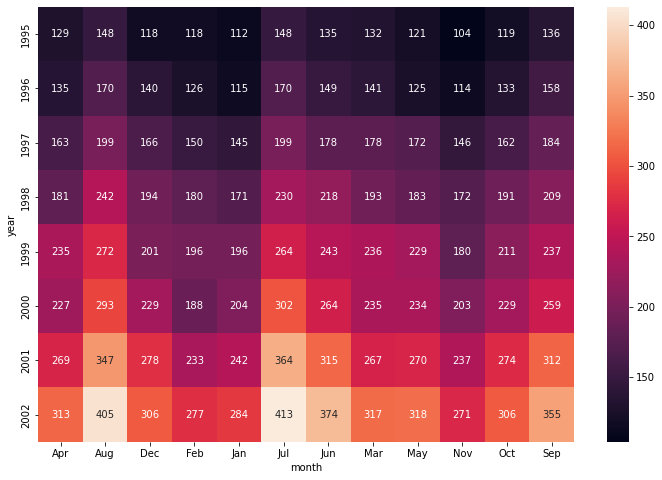

In [66]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

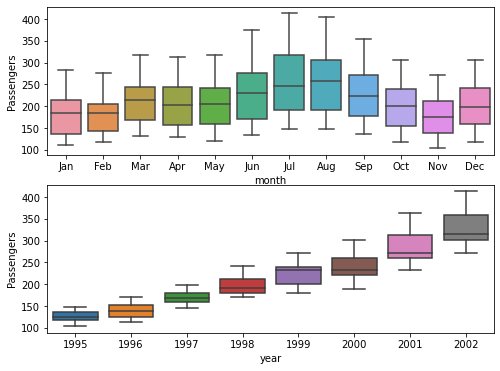

In [67]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

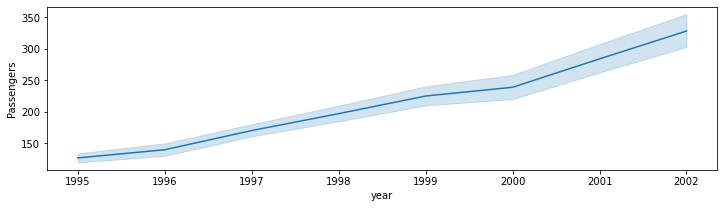

In [69]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines)

In [70]:
#splitting data

In [71]:
Train = Airlines.head(81)
Test = Airlines.tail(15)

In [72]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.89389338895583

In [73]:
#Exponential model
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

45.15850528373303

In [74]:
#Quadratic model
Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

45.136758863017576

In [75]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

128.90852985855813

In [76]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.271419236411532

In [77]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.25851571846934

In [78]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.614465847508091

In [79]:
#Compareing the results 
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

MODEL  RMSE_Values
6  rmse_Mult_add_sea     9.614466
4  rmse_add_sea_quad    23.271419
2          rmse_Quad    45.136759
1           rmse_Exp    45.158505
0        rmse_linear    47.893893
3       rmse_add_sea   128.908530
5      rmse_Mult_sea   135.258516

- rmse_Multi_add_sea model have lowest rmse value
- so we can use this model for predictions

In [81]:
newdata = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec'],
          ['2004-01-01', 'Jan'],['2004-02-01', 'Feb'],['2004-03-01', 'Mar'],['2004-04-01', 'Apr'],['2004-05-01', 'May'],['2004-06-01', 'Jun'],
          ['2004-07-01', 'Jul'],['2004-08-01', 'Aug'],['2004-09-01', 'Sep'],['2004-10-01', 'Oct'],['2004-11-01', 'Nov'],['2004-12-01', 'Dec']]
forecast = pd.DataFrame(newdata, columns = ['Date', 'Months'])
forecast

Date Months
0   2003-01-01    Jan
1   2003-02-01    Feb
2   2003-03-01    Mar
3   2003-04-01    Apr
4    2003-5-01    May
5   2003-06-01    Jun
6   2003-07-01    Jul
7   2003-08-01    Aug
8   2003-09-01    Sep
9   2003-10-01    Oct
10  2003-11-01    Nov
11  2003-12-01    Dec
12  2004-01-01    Jan
13  2004-02-01    Feb
14  2004-03-01    Mar
15  2004-04-01    Apr
16  2004-05-01    May
17  2004-06-01    Jun
18  2004-07-01    Jul
19  2004-08-01    Aug
20  2004-09-01    Sep
21  2004-10-01    Oct
22  2004-11-01    Nov
23  2004-12-01    Dec

In [83]:
# Create dummies & T and T-Squared columns
dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,25)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nDummy, T and T-Square\n\n",forecast1.head())


Dummy, T and T-Square

          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4   2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  t  t_squared  
0    0  1          1  
1    0  2          4  
2    0  3          9  
3    0  4         16  
4    0  5         25  


In [87]:
# Forecasting using Multiplicative Additive Seasonality Model Because RMSE Value is Less Compared to  Other RMSE Values

final_model = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_new  = pd.Series(final_model.predict(forecast1))

forecast1["Forecasted_log"] = pd.Series(pred_new)

forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])

In [88]:
# Final Prediction for next 12 months

Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Passengers']] 
Final_predict

Date  Forecasted_Passengers
0   2003-01-01             109.225046
1   2003-02-01             110.941573
2   2003-03-01             128.171301
3   2003-04-01             123.672408
4    2003-5-01             122.476287
5   2003-06-01             137.865598
6   2003-07-01             153.475726
7   2003-08-01             153.533353
8   2003-09-01             137.931167
9   2003-10-01             121.218040
10  2003-11-01             106.493012
11  2003-12-01             121.912528
12  2004-01-01             124.881947
13  2004-02-01             126.844530
14  2004-03-01             146.544060
15  2004-04-01             141.400272
16  2004-05-01             140.032692
17  2004-06-01             157.627988
18  2004-07-01             175.475756
19  2004-08-01             175.541644
20  2004-09-01             157.702957
21  2004-10-01             138.594081
22  2004-11-01             121.758289
23  2004-12-01             139.388121